<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/laavanya/human-stress-detection-in-and-through-sleep/data

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset/SaYoPillow.csv')
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [3]:
df.shape

(630, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [5]:
df.describe()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [6]:
df[df['sr.1']==0]

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
13,96.288,26.288,85.36,17.144,82.432,100.36,0.0,75.72,4
31,96.256,26.256,85.32,17.128,82.384,100.32,0.0,75.64,4
33,99.904,29.904,89.88,18.952,87.856,104.88,0.0,84.76,4
37,98.528,28.528,88.16,18.264,85.792,103.16,0.0,81.32,4
39,98.720,28.720,88.40,18.360,86.080,103.40,0.0,81.80,4
...,...,...,...,...,...,...,...,...,...
606,97.760,27.760,87.20,17.880,84.640,102.20,0.0,79.40,4
611,98.592,28.592,88.24,18.296,85.888,103.24,0.0,81.48,4
620,97.024,27.024,86.28,17.512,83.536,101.28,0.0,77.56,4
623,98.144,28.144,87.68,18.072,85.216,102.68,0.0,80.36,4


In [7]:
df[(df['sr.1']==0) & (df['sl']==4)].count()

sr      126
rr      126
t       126
lm      126
bo      126
rem     126
sr.1    126
hr      126
sl      126
dtype: int64

In [8]:
df.duplicated().sum()

0

<h2>EDA</h2>

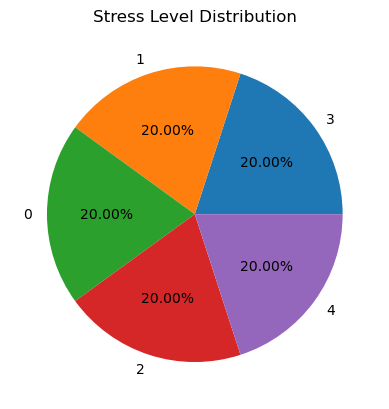

In [9]:
plt.pie(df['sl'].value_counts(), labels=df['sl'].value_counts().index, autopct='%1.2f%%')
plt.title('Stress Level Distribution')
plt.show();

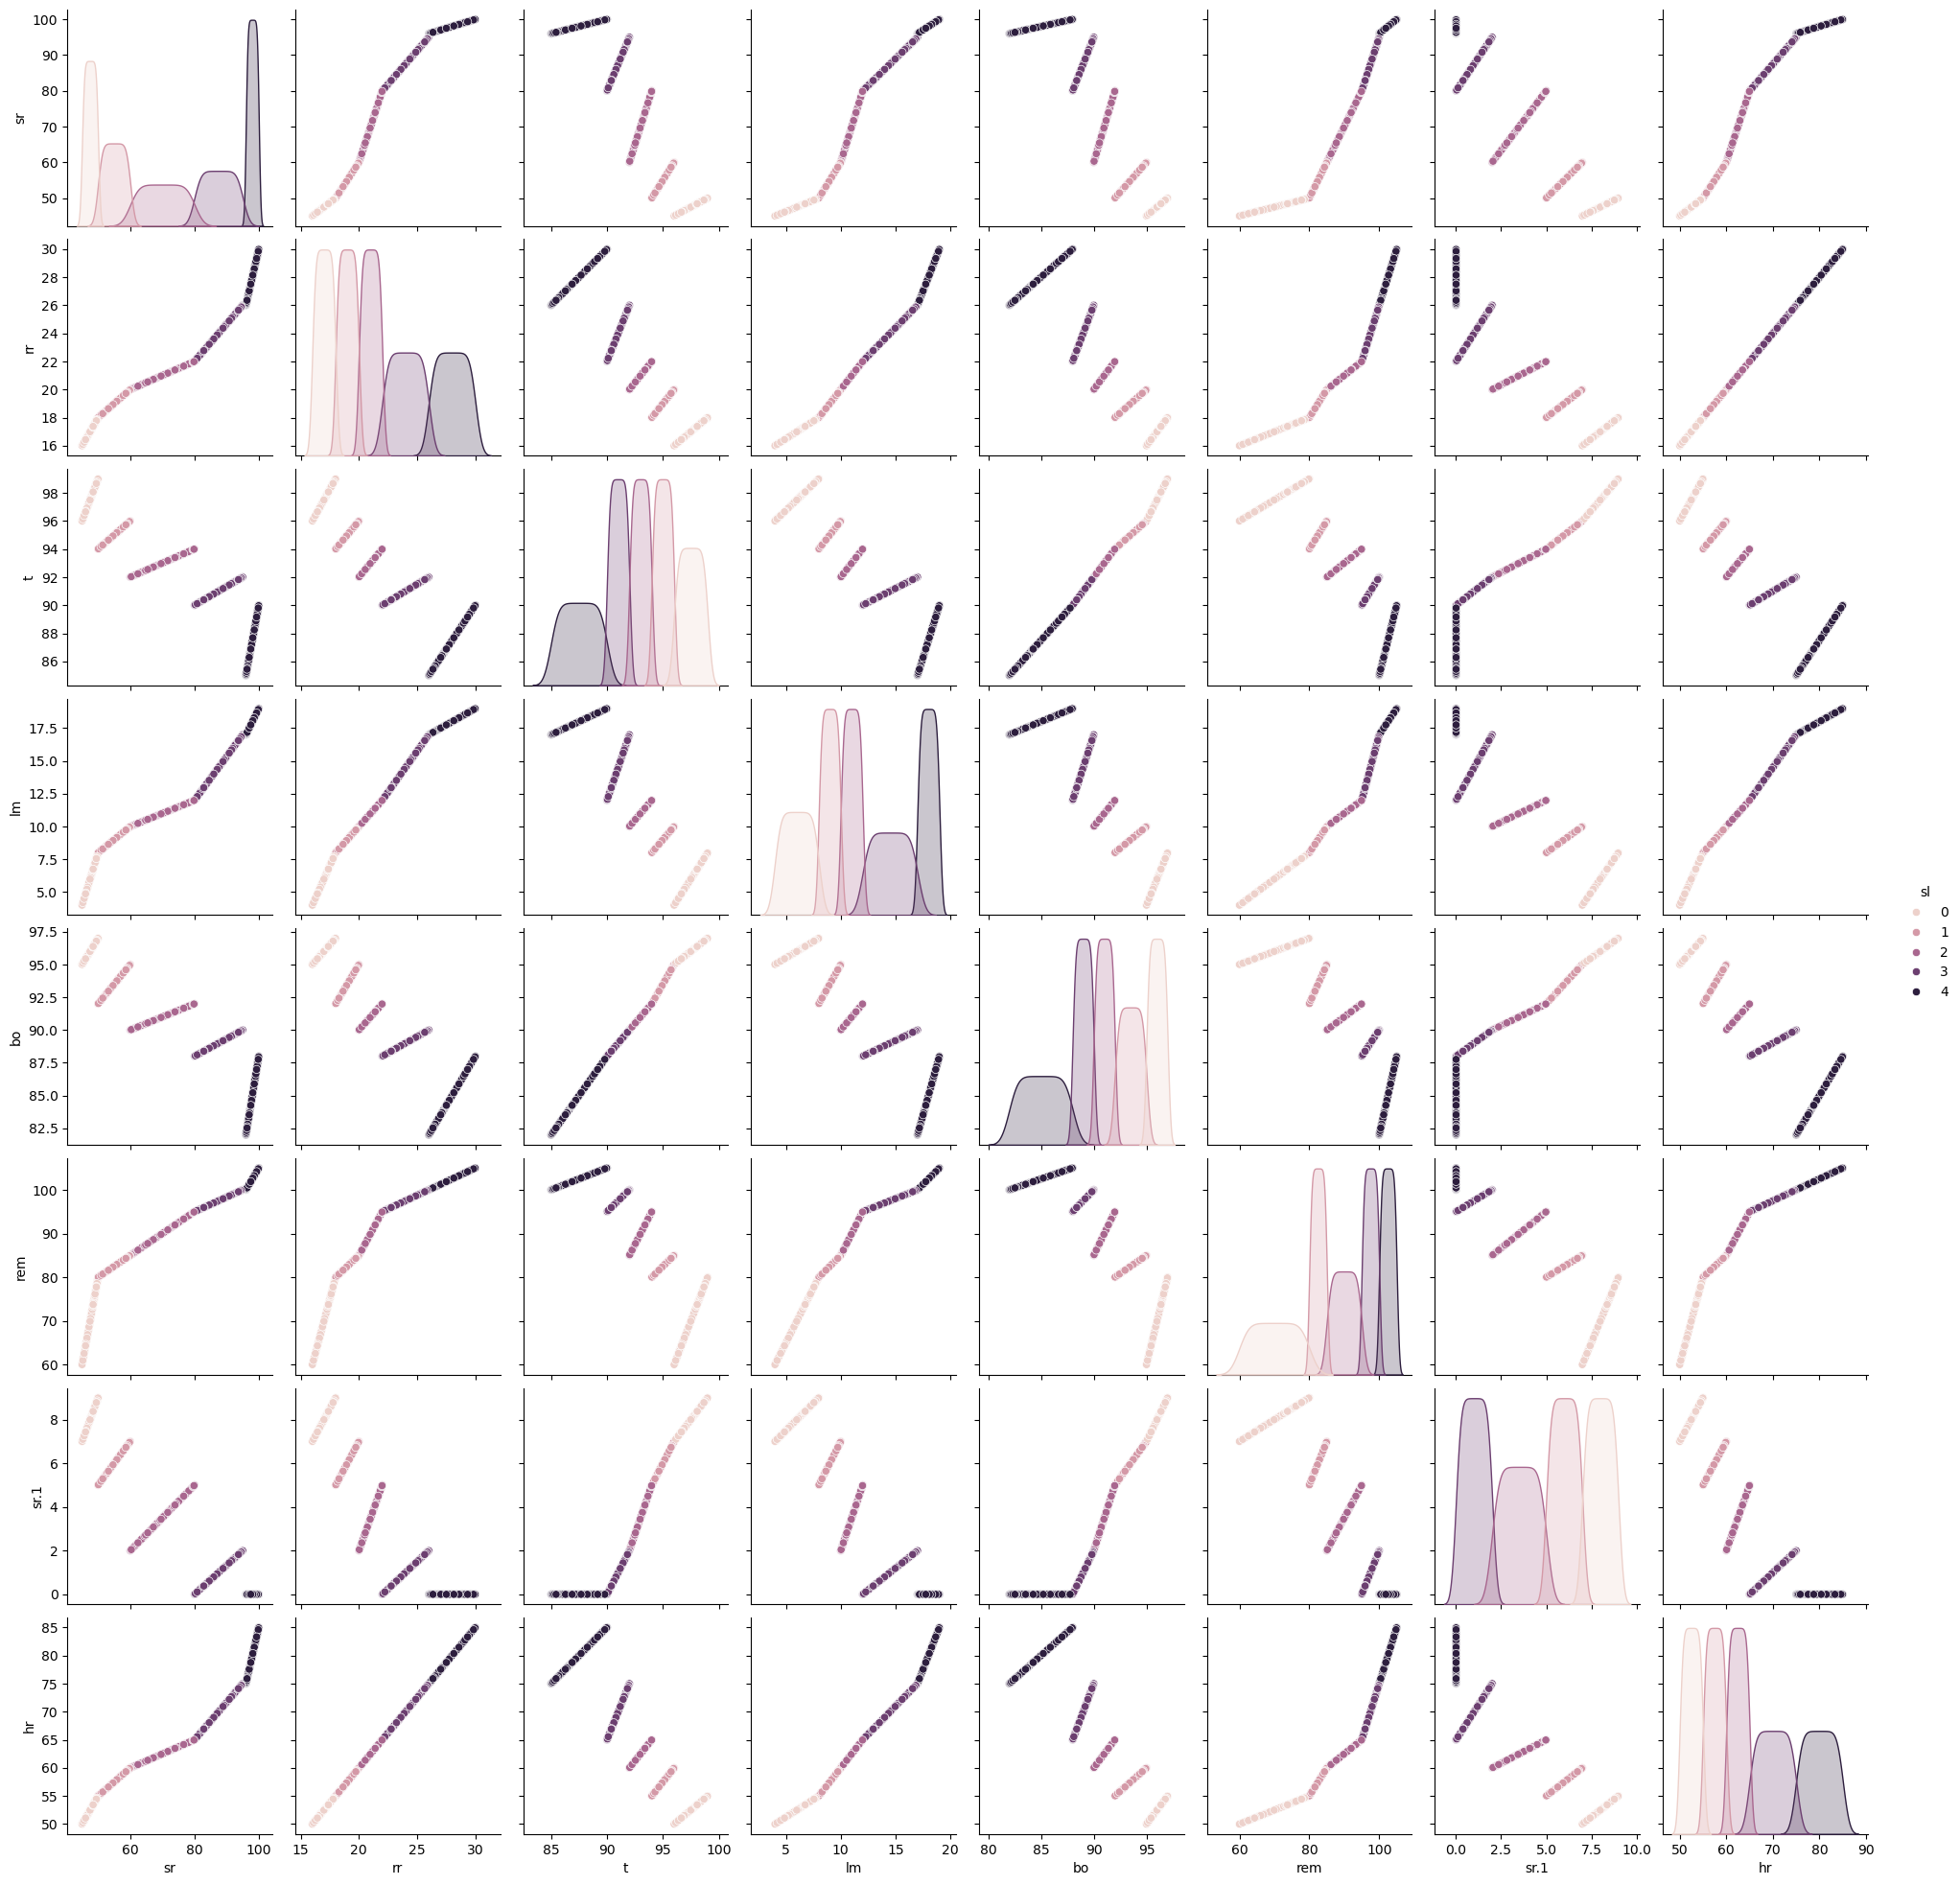

In [10]:
sns.pairplot(df, hue='sl')

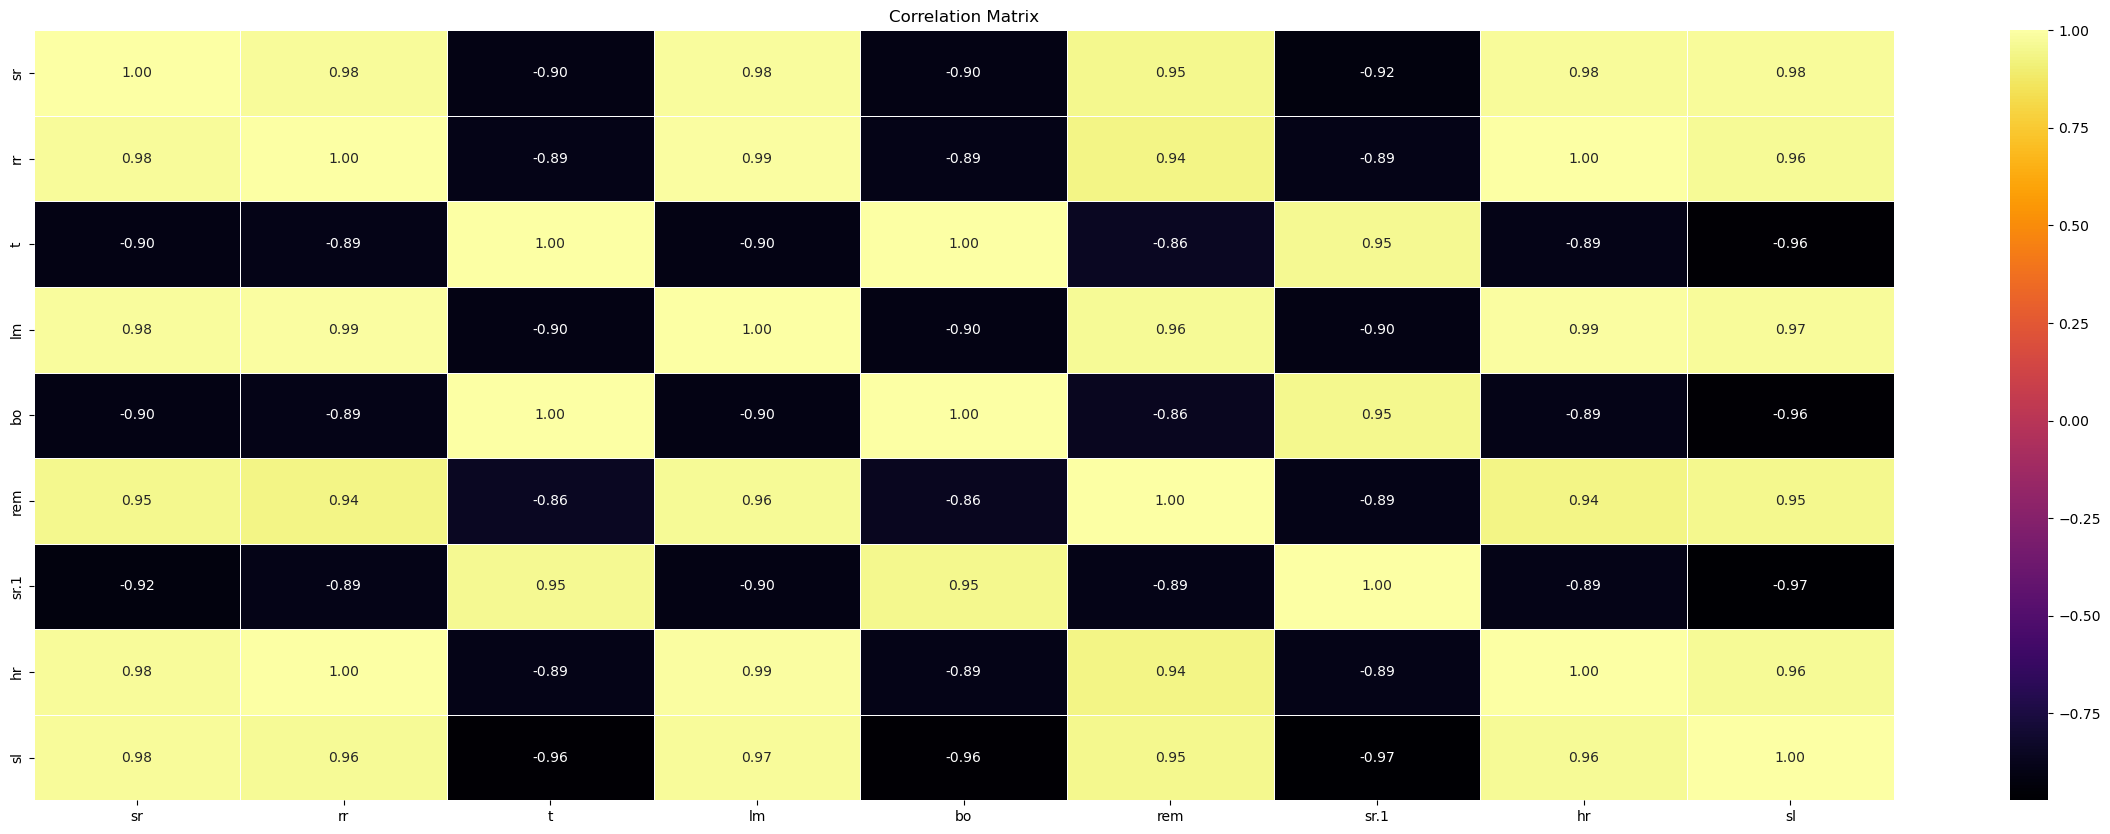

In [11]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="inferno", fmt='.2f', linewidth=0.5)
plt.title('Correlation Matrix')
plt.show();

In [12]:
x = df.drop('sl', axis=1)
y = df['sl']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<h2>Machine Learning</h2>

In [13]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)
lr_model.score(x_train, y_train)

1.0

In [14]:
y_pred = lr_model.predict(x_test)
print('Accruacy test:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accruacy test: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

[[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


<h2>Deep Learning</h2>

In [15]:
nn = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = nn.fit(x_train, y_train, epochs=50, batch_size=10, validation_data = (x_test, y_test), callbacks=[EarlyStopping(patience=5)])

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.3817 - loss: 1.3270 - val_accuracy: 0.6667 - val_loss: 0.7769
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7160 - loss: 0.7335 - val_accuracy: 0.8413 - val_loss: 0.4810
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8940 - loss: 0.4667 - val_accuracy: 1.0000 - val_loss: 0.2304
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9493 - loss: 0.2619 - val_accuracy: 0.9683 - val_loss: 0.1408
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9686 - loss: 0.1514 - val_accuracy: 1.0000 - val_loss: 0.0523
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9936 - loss: 0.0971 - val_accuracy: 1.0000 - val_loss: 0.0276
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9981 - loss: 0.0572 - val_accuracy: 1.0000 - val_loss: 0.0171
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9923 - loss: 0.0503 - val_accuracy: 1.0000 - v

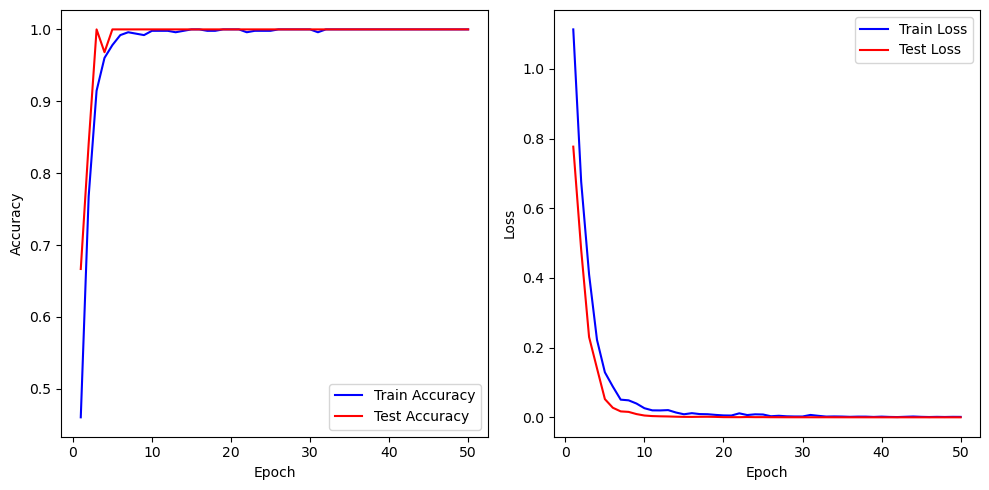

In [16]:
# learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, acc, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
# adusting layout for better spacing
plt.tight_layout()
# display the figure
plt.show();

In [17]:
pred = nn.predict(x_test)
y_pred = np.argmax(pred, axis=1)

print("Test Accuracy:", accuracy_score(y_test, y_pred))    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

[[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


<h2>Machine Learning vs Deep Learning</h2>

In [18]:
new_df = [[71, 22, 91, 11, 91, 90, 4, 62]]
scaled_df = sc.transform(new_df)

ML_pred = lr_model.predict(scaled_df)

y_pred = nn.predict(scaled_df)
NN_pred = np.argmax(y_pred, axis=1)

print("ML Prediction: ", ML_pred)
print("DL Prediction:", NN_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
ML Prediction:  [2]
DL Prediction: [2]
